In [11]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

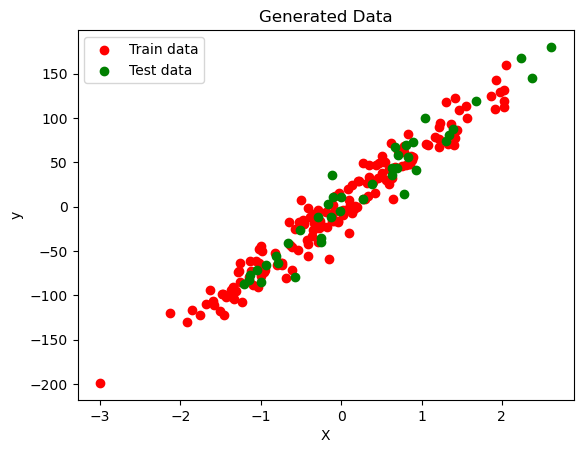

In [2]:
X, y = make_regression(n_samples=200, n_features=1, noise=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254397)
plt.scatter(X_train, y_train, color='red', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

In [3]:
#Normalizacja
y_min = min(y_train)
y_max = max(y_train)
y_train = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_train]

x_min = min(X_train)
x_max = max(X_train)
X_train = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_train])

Text(0, 0.5, 'Y')

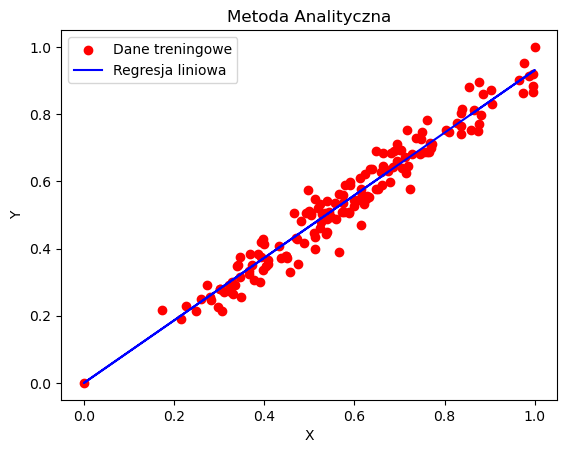

In [4]:
#Metoda analityczna
theta = (np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
y_pred = X_train @ theta
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred, color='blue', label='Regresja liniowa')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')


Analityczna: [0.9311961], numeryczna: [0.9311961]


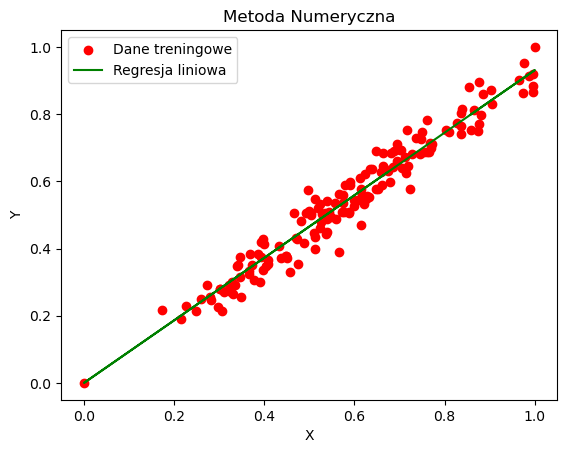

In [5]:
#Metoda numeryczna
def cost_function(teta, X, y):
    return 1/(len(X))*(y - X.T * teta) @ (y - X.T * teta).T
result = minimize(cost_function, x0=0, args=(X_train, y_train), method='Powell')
coeff = result.x
y_pred_powell = X_train.dot(coeff)
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred_powell, color='green', label='Regresja liniowa')
plt.title('Metoda Numeryczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Analityczna: {theta}, numeryczna: {coeff}')

In [38]:
#Wczytywanie danych z danych z gry
column_names = ['X', 'y']
flapy_1 = pd.read_csv('last_autosave_1.csv', names=column_names)
flapy_2 = pd.read_csv('last_autosave_2.csv', names=column_names)
flapy_3 = pd.read_csv('last_autosave_3.csv', names=column_names)
X_1 = np.array(flapy_1['X']).reshape(-1,1)
y_1 = np.array(flapy_1['y'])

X_2 = np.array(flapy_2['X']).reshape(-1,1)
y_2 = np.array(flapy_2['y'])

X_3 = np.array(flapy_3['X']).reshape(-1,1)
y_3 = np.array(flapy_3['y'])
Y_ = [y_1, y_2, y_3]
X_ = [X_1, X_2, X_3]

In [60]:
X_chosen = X_[0]
Y_chosen = Y_[0]

y_min = min(Y_chosen)
y_max = max(Y_chosen)
Y_chosen = [(y_comp - y_min) / (y_max - y_min) for y_comp in Y_chosen]

x_min = min(X_chosen)
x_max = max(X_chosen)
X_chosen = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_chosen])

Text(0, 0.5, 'Y')

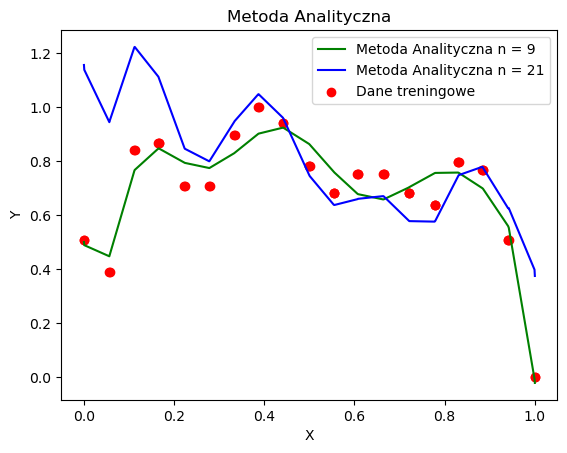

In [61]:
poly_9_1 = PolynomialFeatures(9, include_bias=True)
poly_21_1 = PolynomialFeatures(21, include_bias=True)

# X_9_1_train, X_9_1_test, y_9_1_train, y_9_1_test = train_test_split(X_1, y_1, test_size = 1/2, random_state=254397)
# X_21_1_train, X_21_1_test, y_21_1_train, y_21_1_test = train_test_split(X_1, y_1, test_size = 1/2, random_state=254397)

#XP_1 = np.c_[X_1, np.ones_like(X_1)]

XP_9_1 = poly_9_1.fit_transform(X_chosen)
XP_21_1 = poly_21_1.fit_transform(X_chosen)

reg9 = LinearRegression()
reg9.fit(XP_9_1, Y_chosen)
y_pred_9_1_linear = reg9.predict(XP_9_1)
# print(reg.coef_)

reg21 = LinearRegression()
reg21.fit(XP_21_1, Y_chosen)
y_pred_21_1_linear = reg21.predict(XP_21_1)


# print(f'Sklearn: {reg.score(XP_9_1, y_1)}')

# print(f'XP_9_1: {XP_9_1.shape}, \nXP_9_1.T: {XP_9_1.T.shape}, \ny_1: {y_1.shape}, \nXP_9_1.T @ XP_9_1: {(XP_9_1.T @ XP_9_1).shape},\n np.linalg.inv(XP_9_1.T @ XP_9_1): {(np.linalg.inv(XP_9_1.T @ XP_9_1)).shape}')
theta_9_1 = np.linalg.inv(XP_9_1.T @ XP_9_1) @ XP_9_1.T @ Y_chosen
y_pred_9_1 = XP_9_1 @ theta_9_1

theta_21_1 = np.linalg.inv(XP_21_1.T @ XP_21_1) @ XP_21_1.T @ Y_chosen
y_pred_21_1 = XP_21_1 @ theta_21_1
# print(y_pred_9_1)
# print(X_1)

# print(f'Analityczna: {theta_9_1}')

plt.plot(X_chosen, y_pred_9_1, color='green', label='Metoda Analityczna n = 9')
plt.plot(X_chosen, y_pred_21_1, color='blue', label='Metoda Analityczna n = 21')
plt.scatter(X_chosen, Y_chosen, color='red', label='Dane treningowe')
# plt.plot(X_1, y_pred_9_1_linear, color='green', label='Regresja liniowa n = 9')
# plt.plot(X_1, y_pred_21_1_linear, color='black', label='Regresja liniowa n = 21')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

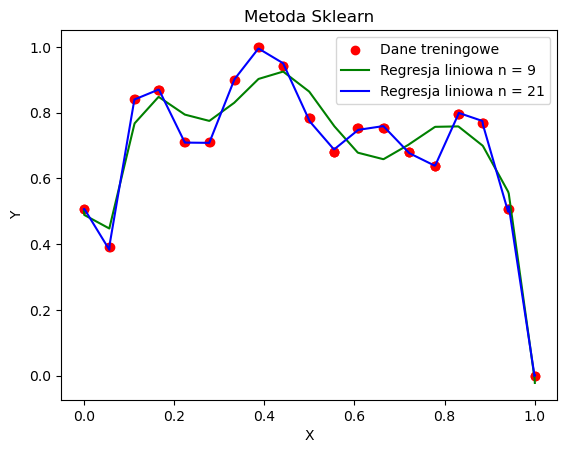

In [62]:
# plt.plot(X_1, y_pred_9_1, color='pink', label='Metoda Analityczna n = 9')
# plt.plot(X_1, y_pred_21_1, color='yellow', label='Metoda Analityczna n = 21')
plt.scatter(X_chosen, Y_chosen, color='red', label='Dane treningowe')


plt.plot(X_chosen, y_pred_9_1_linear, color='green', label='Regresja liniowa n = 9')
plt.plot(X_chosen, y_pred_21_1_linear, color='blue', label='Regresja liniowa n = 21')
plt.title('Metoda Sklearn')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

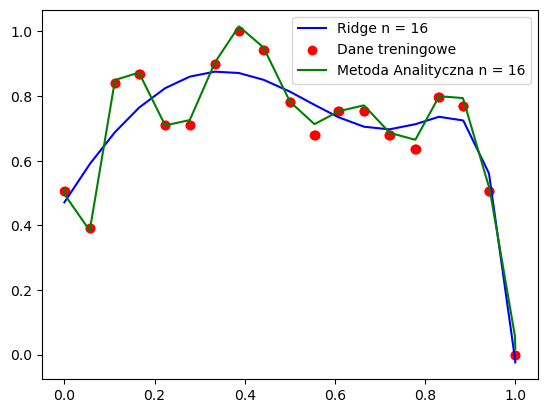

In [63]:
poly_16_1 = PolynomialFeatures(16, include_bias=True)
XP_16_1 = poly_16_1.fit_transform(X_chosen)

lambda_16 = 100
I = np.ones_like((XP_16_1.T @ XP_16_1))
theta_16_1 = np.linalg.inv(XP_16_1.T @ XP_16_1 + lambda_16 * I) @ XP_16_1.T @ Y_chosen
y_pred_16_1 = XP_16_1 @ theta_16_1



ridge = Ridge(alpha=0.001)
ridge.fit(XP_16_1, Y_chosen)
y_pred_ridge = ridge.predict(XP_16_1)


plt.plot(X_chosen, y_pred_ridge, color='blue', label='Ridge n = 16')
plt.scatter(X_chosen, Y_chosen, color='red', label='Dane treningowe')
plt.plot(X_chosen, y_pred_16_1, color='green', label='Metoda Analityczna n = 16')
plt.legend()